This notebook based on data submissions:


- #### LB=0.36995 - v1 - [Ex11 : Org+PSS5E6 : Autogluon : 36 models - 2](https://www.kaggle.com/code/gauravduttakiit/ex11-org-pss5e6-autogluon-36-models-2) by [Gaurav Dutta](https://www.kaggle.com/gauravduttakiit)
- #### LB=0.36964 - v3 - [Optimal Fertilizers | NN+XGB+LGBM+CAT+HGB+YDF](https://www.kaggle.com/code/mikhailnaumov/optimal-fertilizers-nn-xgb-lgbm-cat-hgb-ydf) by [Mikhail Naumov](https://www.kaggle.com/mikhailnaumov)
- #### LB=0.37228 - v1 - [PG S5E6 - XGBx3 - [CV 0.37049 LB 0.37228]](https://www.kaggle.com/code/mahoganybuttstrings/pg-s5e6-xgbx3-cv-0-37049-lb-0-37228) by [Mahog](https://www.kaggle.com/mahoganybuttstrings)

In each line are compared

if &nbsp;2 coincide, this result is taken, otherwise, &nbsp;Mahog.decision

&nbsp;

An attempt will be made to swap the 2nd and 3rd elements

first glance - in the resulting df.(LB=0.37248) - 3 attempts ( 16.06.2025 )
- LB=0.36808 - in all rows
- LB=0.37036 - in odd rows
- LB=0.37021 - in even rows

alternately, in each of the three df on which the solution is built
with the launch of the resulting algorithm, which will select either two equal, or manually select one row, we will record and save each result, it may be possible to make a cut by the indices of the best of the experiments. It is clear that this is not ML, but maybe these actions and their results will show the "correct" path when making a decision, let's start with a first glance

In terms of ML, we asked [one of our masters](https://www.kaggle.com/code/sulaniishara/smart-fertilizer-ranker-map-3-xgboost/comments) to express his opinion

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


path_ds = '/kaggle/input/16-june-2025-fertilizer-18'

solut_names = ['','Gaurav_Dutta','M_Naumov','Mahog']

def load(path=path_ds):
    
    path += '/submission__LB_'

    df1  = pd.read_csv(path + '0_36995__v01__Gaurav_Dutta'+ '.csv')
    df2  = pd.read_csv(path + '0_36964__v03__M_Naumov'    + '.csv')
    df3  = pd.read_csv(path + '0_37228__v01__Mahog'       + '.csv')
    df3g = pd.read_csv(path + '0_37228__v01__Mahog__GEN'  + '.csv')

    df1  = df1 .rename(columns={'Fertilizer Name':'Gaurav_Dutta' })
    df2  = df2 .rename(columns={'Fertilizer Name':'M_Naumov'     })
    df3  = df3 .rename(columns={'Fertilizer Name':'Mahog'        })
    df3g = df3g.rename(columns={'Fertilizer Name':'Mahog' +'_GEN'})
    
    anyTwo = ["" for i in range(250_000)]
    notEqu = ["" for i in range(250_000)]
    
    df1['anyTwo1'],df2['anyTwo2'],df3['anyTwo3'],df3g['Add'] = anyTwo,anyTwo,anyTwo,notEqu

    dfs = pd.merge(df1, df2,  on="id")
    dfs = pd.merge(dfs, df3,  on="id")
    dfs = pd.merge(dfs, df3g, on="id")
    
    return dfs

In [2]:
def f_anyTwo1(x,ns=solut_names):
    if (x[ns[1]]==x[ns[2]] or x[ns[1]]==x[ns[3]]) and x[ns[2]]!=x[ns[3]]: 
        return None
    return ""
def f_anyTwo2(x,ns=solut_names):
    if (x[ns[2]]==x[ns[1]] or x[ns[2]]==x[ns[3]]) and x[ns[1]]!=x[ns[3]]: 
        return None
    return ""
def f_anyTwo3(x,ns=solut_names):
    if (x[ns[3]]==x[ns[1]] or x[ns[3]]==x[ns[2]]) and x[ns[1]]!=x[ns[2]]: 
        return None
    return ""

def f_not_equ(x,ns=solut_names):
    if x[ns[1]]!=x[ns[2]] and x[ns[1]]!=x[ns[3]] and x[ns[2]]!=x[ns[3]]: 
        return None
    return ''

In [3]:
dfs = load()

display(dfs[5_850:5_855])

,id,Gaurav_Dutta,anyTwo1,M_Naumov,anyTwo2,Mahog,anyTwo3,Mahog_GEN,Add
5850,755850,10-26-26 14-35-14 28-28,,10-26-26 20-20 28-28,,10-26-26 20-20 28-28,,10-26-26 20-20 28-28,
5851,755851,10-26-26 17-17-17 14-35-14,,17-17-17 10-26-26 14-35-14,,17-17-17 10-26-26 14-35-14,,17-17-17 10-26-26 14-35-14,
5852,755852,17-17-17 10-26-26 28-28,,17-17-17 Urea 10-26-26,,17-17-17 Urea 10-26-26,,17-17-17 Urea 10-26-26,
5853,755853,14-35-14 10-26-26 DAP,,14-35-14 10-26-26 Urea,,14-35-14 Urea DAP,,14-35-14 Urea DAP,
5854,755854,14-35-14 DAP 20-20,,14-35-14 DAP 20-20,,14-35-14 DAP 20-20,,14-35-14 DAP 20-20,


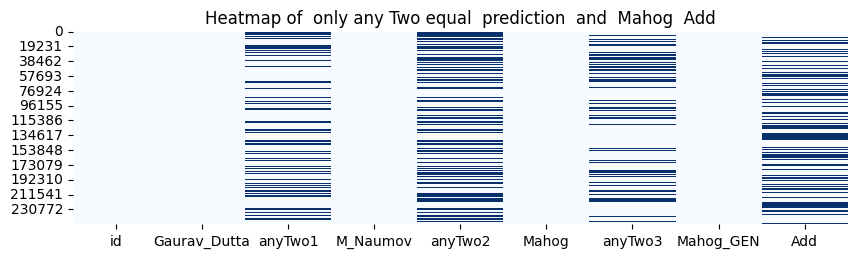

In [4]:
def Visual_AnyTwo_and_Add(dfs, gen):
    dfs['anyTwo1'] = dfs.apply(lambda x: f_anyTwo1(x), axis=1)
    dfs['anyTwo2'] = dfs.apply(lambda x: f_anyTwo2(x), axis=1)
    dfs['anyTwo3'] = dfs.apply(lambda x: f_anyTwo3(x), axis=1)
    dfs['Add'    ] = dfs.apply(lambda x: f_not_equ(x), axis=1)
    
    plt.figure(figsize=(10, 2.5))
    sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
    plt.title(f"Heatmap of  only any Two equal  prediction  and  {gen}  Add")
    plt.show()


Visual_AnyTwo_and_Add(dfs, gen='Mahog')

In [5]:
#df = pd.read_csv(path_ds + '/submission__LB_' + '0_37228__v01__Mahog__GEN.csv') # LB = 0.37248

p = '/subm_16_06___base_0_37748__ exchange_2_3__in__'

path = '/kaggle/input/16-june-2025-fertilizer-18' + p


df =  pd.read_csv(path + 'all_rows__df_Mahog_GEN.csv') # LB=0.36808
df =  pd.read_csv(path + 'odd_rows__df_Mahog_GEN.csv') # LB=0.37036
df =  pd.read_csv(path +'even_rows__df_Mahog_GEN.csv') # LB=0.37021


df.to_csv('submission.csv', index=False)

df

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 Urea
2,750002,20-20 28-28 Urea
3,750003,14-35-14 DAP 17-17-17
4,750004,Urea 10-26-26 20-20
...,...,...
249995,999995,Urea 28-28 14-35-14
249996,999996,28-28 17-17-17 10-26-26
249997,999997,DAP 10-26-26 Urea
249998,999998,10-26-26 17-17-17 28-28
